## 1. NLP
### In this part, we pre-processed the description of the companies to be prepared for the recommendtion system later on

In [22]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance

In [23]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Libraries for text preprocessing
import re # remove punctuations, special characters and digits
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
### Please download these pakages for running this code:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [25]:
dataset = pd.read_csv('SP500IT.csv')
dataset.head()

,ID,Symbol,Name,Sector,Industry,Full Time Employees,CEO,Address,Description
0,1,AAPL,Apple Inc,Technology,Consumer Electronics,"137,000",Timothy D. Cook,"One Apple Park Way\nCupertino, CA 95014\nUnite...","Apple Inc. designs, manufactures, and markets ..."
1,2,ACN,Accenture Plc,Technology,Information Technology Services,492000,Julie T. Spellman Sweet,1 Grand Canal Square\nGrand Canal Harbour\nDub...,"Accenture plc provides consulting, technology,..."
2,3,ADBE,Adobe Systems Inc,Technology,Software - Application,21357,Shantanu Narayen,"345 Park Avenue\nSan Jose, CA 95110\nUnited St...",Adobe Inc. operates as a diversified software ...
3,4,ADI,Analog Devices,Technology,Semiconductors,"15,800",Vincent T. Roche,"One Technology Way\nPO Box 9106\nNorwood, MA 0...","Analog Devices, Inc. designs, manufactures, an..."
4,5,ADP,Automatic Data Procs,Industrials,Business Services,"58,000",Carlos A. Rodriguez,"One ADP Boulevard\nRoseland, NJ 07068\nUnited ...","Automatic Data Processing, Inc. provides cloud..."


# Only the information in description will be cleaned and employed

In [26]:
dataset[['Symbol','Name','Description']].head()

,Symbol,Name,Description
0,AAPL,Apple Inc,"Apple Inc. designs, manufactures, and markets ..."
1,ACN,Accenture Plc,"Accenture plc provides consulting, technology,..."
2,ADBE,Adobe Systems Inc,Adobe Inc. operates as a diversified software ...
3,ADI,Analog Devices,"Analog Devices, Inc. designs, manufactures, an..."
4,ADP,Automatic Data Procs,"Automatic Data Processing, Inc. provides cloud..."


In [27]:
dataset_Org = pd.DataFrame(dataset)
stop_words=set(stopwords.words("english"))

# Enter the keywords first for the recommendation program to continue

user input samples : 

1. I want to have a good apple stock
2. Western Digital Corporation : develops, manufactures, and sells data storage devices and solutions worldwide. It offers client devices, including hard disk drives (HDDs) and solid state drives (SSDs) for computing devices, such as desktop and notebook personal computers (PCs)
3. Fleetcor Technologies Inc:  payments products include virtual cards, purchasing cards, travel and entertainment cards, payroll cards
4. Seagate: The company manufactures and distributes hard disk drives; solid state drives


In [65]:
#Now try a sentence of really from customer search:
cust_input = input("Please enter some keywords:")

Please enter some keywords: The company manufactures and distributes hard disk drives; solid state drives


In [67]:
corpus_input= []
#Remove punctuations
input_text = re.sub('[^a-zA-Z,]', ' ', cust_input)
print(input_text)
#Convert to lowercase
input_text = input_text.lower()
    
#remove tags
input_text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",input_text)

# remove special characters and digits
input_text=re.sub("(\\d|\\W)+"," ",input_text)
    
##Convert to list from string
input_text = input_text.split()
print(input_text)

 The company manufactures and distributes hard disk drives  solid state drives
['the', 'company', 'manufactures', 'and', 'distributes', 'hard', 'disk', 'drives', 'solid', 'state', 'drives']


In [68]:
lem = WordNetLemmatizer()
input_text = [lem.lemmatize(word) for word in input_text if not word in  stop_words] 
input_text = " ".join(input_text)

corpus_input.append(str(input_text))
print(input_text)
corpus_input

cust_input_tokenized = nltk.word_tokenize(input_text) #tokenize customer input after preprocessed
input_text=cust_input_tokenized

company manufacture distributes hard disk drive solid state drive


In [69]:
BoWA = cust_input_tokenized
BoWA

['company',
 'manufacture',
 'distributes',
 'hard',
 'disk',
 'drive',
 'solid',
 'state',
 'drive']

In [70]:
Id = int(100000)
dataset = dataset_Org.append(pd.Series(Id,index=['ID']), ignore_index=True)
dataset.loc[dataset['ID'] == 100000, ['Name','Description']] = ("customer request", corpus_input)
dataset

,ID,Symbol,Name,Sector,Industry,Full Time Employees,CEO,Address,Description
0,1.0,AAPL,Apple Inc,Technology,Consumer Electronics,"137,000",Timothy D. Cook,"One Apple Park Way\nCupertino, CA 95014\nUnite...","Apple Inc. designs, manufactures, and markets ..."
1,2.0,ACN,Accenture Plc,Technology,Information Technology Services,492000,Julie T. Spellman Sweet,1 Grand Canal Square\nGrand Canal Harbour\nDub...,"Accenture plc provides consulting, technology,..."
2,3.0,ADBE,Adobe Systems Inc,Technology,Software - Application,21357,Shantanu Narayen,"345 Park Avenue\nSan Jose, CA 95110\nUnited St...",Adobe Inc. operates as a diversified software ...
3,4.0,ADI,Analog Devices,Technology,Semiconductors,"15,800",Vincent T. Roche,"One Technology Way\nPO Box 9106\nNorwood, MA 0...","Analog Devices, Inc. designs, manufactures, an..."
4,5.0,ADP,Automatic Data Procs,Industrials,Business Services,"58,000",Carlos A. Rodriguez,"One ADP Boulevard\nRoseland, NJ 07068\nUnited ...","Automatic Data Processing, Inc. provides cloud..."
5,6.0,ADS,Alliance Data Systems Corp,Financial Services\n,Credit Services,10000,Melisa A. Miller,"3075 Loyalty Circle\nColumbus, OH 43219\nUnite...",Alliance Data Systems Corporation provides dat...
6,7.0,ADSK,Autodesk Inc,Technology,Software - Application,"9,600",Andrew Anagnost,"111 McInnis Parkway\nSan Rafael, CA 94903\nUni...","Autodesk, Inc. operates as a design software a..."
7,8.0,AKAM,Akamai Technologies,Technology,Software - Application,"7,579",F. Thomson Leighton,"Kendall Square\n145 Broadway\nCambridge, MA 02...","Akamai Technologies, Inc. provides cloud servi..."
8,9.0,AMAT,Applied Materials,Technology,Semiconductor Equipment & Materials,"21,600",Gary E. Dickerson,"3050 Bowers Avenue\nPO Box 58039\nSanta Clara,...","Applied Materials, Inc. provides manufacturing..."
9,10.0,AMD,Adv Micro Devices,Technology,Semiconductors,"10,100",Lisa T. Su,"2485 Augustine Drive\nSanta Clara, CA 95054\nU...","Advanced Micro Devices, Inc. operates as a sem..."


In [71]:
corpus= []
for i in range(0, len(dataset['Description'])):
    
    #Remove punctuations
    text = re.sub('[^a-zA-Z,]', ' ', str (dataset['Description'][i]))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append((text))

### All punctuations, special characters, tags are removed and uppercase letters has been standardized to lowercase. Therefore, each stock company's desciption is standardized as a group of lowercased words seperated by a single space so the system can process easily later.

In [72]:
dataset['Processed'] = corpus


In [73]:
dataset[['Description','Processed']].head()

,Description,Processed
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...


## The "Proccessed" column will be converted into bag of words (the "BoWB" column) which is a vector of the words as elements  for later algorithm implementation

In [74]:
BoWB =[]
for i in range(0, len(dataset['Processed'])):
    #Remove punctuations
    text_BoW = re.sub('[^a-zA-Z]', ' ', dataset['Processed'][i])
    text_BoW = text_BoW.split()
    BoWB.append((text_BoW))

In [75]:
dataset['BoWB'] = BoWB
dataset[['Description','Processed','BoWB']].head()

,Description,Processed,BoWB
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...,"[apple, inc, design, manufacture, market, smar..."
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...,"[accenture, plc, provides, consulting, technol..."
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...,"[adobe, inc, operates, diversified, software, ..."
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...,"[analog, device, inc, design, manufacture, mar..."
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...,"[automatic, data, processing, inc, provides, c..."


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,1))
X=cv.fit_transform(dataset['Processed'])

## We turned these BoWB into vector for later use of recommendation part

In [77]:
dataset['dicB'] = X
dataset[['Description','Processed','BoWB','dicB']].head()

,Description,Processed,BoWB,dicB
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...,"[apple, inc, design, manufacture, market, smar...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...,"[accenture, plc, provides, consulting, technol...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...,"[adobe, inc, operates, diversified, software, ...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...,"[analog, device, inc, design, manufacture, mar...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...,"[automatic, data, processing, inc, provides, c...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.svm import SVC
from sklearn.metrics.pairwise import sigmoid_kernel 

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

In [79]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(dataset['Processed'])
tfidf_matrix 

<68x1965 sparse matrix of type '<class 'numpy.float64'>'
	with 6324 stored elements in Compressed Sparse Row format>

In [80]:
tf.fit(dataset['Processed'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

## The following is now to compare the input words for searching with all the company discriptions so to find and recommend the companies with their discriptions closest to the searching key words
## With trying for a few types of the similarity comparison engines, the finally used one is consine similarity with Sigmoid kernel which ususally gives the best outcome, and it is true for our case here as well.

In [81]:
cosine_similarities = sigmoid_kernel(tfidf_matrix, tfidf_matrix) 

similarities = cosine_similarities 

results = {}
for idx, row in dataset.iterrows():
    similar_indices = similarities[idx].argsort()[:-100:-1] 
    similar_items = [(similarities[idx][i], dataset['ID'][i]) for i in similar_indices] 
    results[row['ID']] = similar_items[1:]

# Recommendation 20 outputs based on the keyword entered previously

In [82]:
def item(id):
    return dataset.loc[dataset['ID'] == id]['Name'].tolist()[0].split(' - ')[0]


def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")
        # print(rec)

# recommend(item_id=100000, num=100)
recommend(item_id=100000,num=10)

Recommending 10 products similar to customer request...
-------
Recommended: Seagate Technology plc  (score:0.7616629921069038)
Recommended: Western Digital Corporation (score:0.7616572311097967)
Recommended: KLA Corporation (score:0.7616151465819355)
Recommended: Intel Corporation (score:0.7616135658265266)
Recommended: Nvidia Corp (score:0.7616097750832636)
Recommended: Micron Technology (score:0.7616085521515928)
Recommended: Maxim Integrated Products Inc (score:0.7616057747219878)
Recommended: Texas Instruments Inc (score:0.7616054046883024)
Recommended: Broadridge Financial Solutions Inc (score:0.7616040784164677)
Recommended: Corning Inc (score:0.7616040354339264)


---
----



# 2. Stock Prediction

In [39]:
#import needed libraries to start


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import trendln
from yahoo_fin import stock_info as si
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

from IPython.display import display

#remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas_datareader.data as web


In [40]:
#!pip install requests_html

In [41]:
#get the stock data for stock symbol entry using pandas_datareader

stock_symbol = input("Enter a stock symbol (for example, AAPL): ")
data = web.get_data_yahoo(stock_symbol, '12/3/2017', '3/3/2020',)
data.reset_index(inplace=True,drop=False)

Enter a stock symbol (for example, AAPL): AMD


In [42]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,565.000000,565.000000,565.000000,565.000000,5.650000e+02,565.000000
mean,25.672637,24.603558,25.136938,25.161557,7.353613e+07,25.161557
std,11.411893,11.036056,11.220093,11.250851,3.941474e+07,11.250851
min,9.770000,9.040000,9.080000,9.530000,1.760990e+07,9.530000
25%,16.389999,15.560000,15.840000,16.049999,4.592200e+07,16.049999
50%,25.410000,24.070000,24.650000,24.889999,6.295850e+07,24.889999
75%,31.830000,30.530001,31.129999,31.180000,8.802740e+07,31.180000
max,59.270000,57.509998,58.439999,58.900002,3.250584e+08,58.900002


In [43]:
#showing the
#plt.figure(figsize = (20,10))
#fig = trendln.plot_support_resistance(data.Close)
#plt.savefig('suppres.svg', format='svg')
#plt.show()


In [44]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-12-04,10.86,9.82,10.85,10.03,97328300,10.03
1,2017-12-05,10.34,9.70,9.89,9.91,67304100,9.91
2,2017-12-06,10.05,9.71,9.90,10.00,38952200,10.00
3,2017-12-07,10.19,9.95,10.07,10.04,32665600,10.04
4,2017-12-08,10.20,9.92,10.15,9.94,34897000,9.94
5,2017-12-11,10.16,9.96,9.97,10.16,29956400,10.16
6,2017-12-12,10.14,9.88,10.13,9.90,36211000,9.90
7,2017-12-13,10.21,9.95,9.97,10.11,41494800,10.11
8,2017-12-14,10.17,9.96,10.10,10.13,29006800,10.13
9,2017-12-15,10.32,10.02,10.13,10.29,45462300,10.29


In [45]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
555,2020-02-20,59.020000,56.150002,58.439999,57.270000,74203400,57.270000
556,2020-02-21,56.799999,52.889999,56.709999,53.279999,88271100,53.279999
557,2020-02-24,50.279999,47.490002,48.180000,49.119999,86624100,49.119999
558,2020-02-25,51.240002,47.119999,51.139999,47.570000,88699400,47.570000
559,2020-02-26,49.290001,47.070000,47.700001,47.490002,86378400,47.490002
560,2020-02-27,46.240002,42.209999,45.380001,44.009998,106416200,44.009998
561,2020-02-28,46.150002,41.040001,41.360001,45.480000,100667700,45.480000
562,2020-03-02,47.680000,44.660000,47.419998,47.459999,102324700,47.459999
563,2020-03-03,50.200001,45.669998,49.029999,46.750000,141972300,46.750000
564,2020-03-04,50.139999,47.209999,48.250000,50.110001,93311800,50.110001


In [46]:
#extracting the year, month, and the day from the column 'Date'
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day


In [47]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
0,2017-12-04,10.86,9.82,10.85,10.03,97328300,10.03,2017,12,4
1,2017-12-05,10.34,9.70,9.89,9.91,67304100,9.91,2017,12,5
2,2017-12-06,10.05,9.71,9.90,10.00,38952200,10.00,2017,12,6
3,2017-12-07,10.19,9.95,10.07,10.04,32665600,10.04,2017,12,7
4,2017-12-08,10.20,9.92,10.15,9.94,34897000,9.94,2017,12,8


In [48]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
560,2020-02-27,46.240002,42.209999,45.380001,44.009998,106416200,44.009998,2020,2,27
561,2020-02-28,46.150002,41.040001,41.360001,45.480000,100667700,45.480000,2020,2,28
562,2020-03-02,47.680000,44.660000,47.419998,47.459999,102324700,47.459999,2020,3,2
563,2020-03-03,50.200001,45.669998,49.029999,46.750000,141972300,46.750000,2020,3,3
564,2020-03-04,50.139999,47.209999,48.250000,50.110001,93311800,50.110001,2020,3,4


The skewness of Close on training data is: 0.6478423063474236


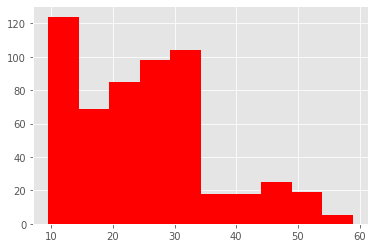

In [49]:
#check the skewness of Close
print ("The skewness of Close on training data is:", data['Close'].skew())
plt.hist(data['Close'], color='red')
plt.show()

The skewness of the log of Close on the data is: -0.19039995420741132


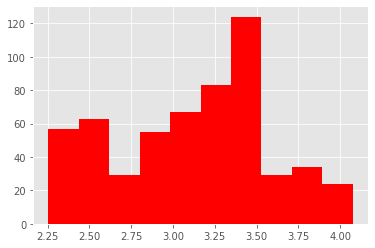

In [50]:
#taking log of Close to reduce the skewness
target = np.log(data['Close'])
print ("The skewness of the log of Close on the data is:", target.skew())
plt.hist(target, color='red')
plt.show()

In [51]:
#check for missing values
null_data = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))[:50]

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data

,Null Count
Feature,
Day,0
Month,0
Year,0
Adj Close,0
Volume,0
Close,0
Open,0
Low,0
High,0


In [52]:
#create a DF for log transformation of Close
data['logClose']=np.log(data['Close']+1)

data.head()
data.shape

(565, 11)

In [53]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,logClose
0,2017-12-04,10.86,9.82,10.85,10.03,97328300,10.03,2017,12,4,2.400619
1,2017-12-05,10.34,9.70,9.89,9.91,67304100,9.91,2017,12,5,2.389680
2,2017-12-06,10.05,9.71,9.90,10.00,38952200,10.00,2017,12,6,2.397895
3,2017-12-07,10.19,9.95,10.07,10.04,32665600,10.04,2017,12,7,2.401525
4,2017-12-08,10.20,9.92,10.15,9.94,34897000,9.94,2017,12,8,2.392426


In [54]:
x = data.drop(columns = ['Date', 'logClose', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
y = data['logClose']

display(x.head())
display(y.head())

,Year,Month,Day
0,2017,12,4
1,2017,12,5
2,2017,12,6
3,2017,12,7
4,2017,12,8


0    2.400619
1    2.389680
2    2.397895
3    2.401525
4    2.392426
Name: logClose, dtype: float64

In [55]:
#split the given train dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.35, shuffle=False)
x_train.head()

,Year,Month,Day
0,2017,12,4
1,2017,12,5
2,2017,12,6
3,2017,12,7
4,2017,12,8


In [56]:
#import needed libraries
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

#create a function to calculate the mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def printScore(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    
    print('Evaluation Metrics')
    print('MAE         : %0.4f ' % mae)
    print('MAPE        : %0.4f ' % mape)
    print('RMSLE       : %0.4f ' % rmsle)   

!pip install lightgbm

In [57]:
#Linear Regression

lr = LinearRegression(n_jobs = -1)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

print('-------Linear Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr.predict(x_test)

print('')
print('-------Linear Regression(on Test Set)------')
printScore(y_test, y_pred)

-------Linear Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.1240 
MAPE        : 4.2628 
RMSLE       : 0.0424 

-------Linear Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1505 
MAPE        : 4.2245 
RMSLE       : 0.0388 


In [58]:
#LR_Lasso
model_lasso = Lasso(random_state=42,alpha=0.00035)
lr_lasso = make_pipeline(RobustScaler(), model_lasso)
lr_lasso.fit(x_train,y_train)



y_pred = lr_lasso.predict(x_train)

print('-------LR_lasso Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr_lasso.predict(x_test)

print('')
print('-------LR_lasso Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LR_lasso Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.1238 
MAPE        : 4.2585 
RMSLE       : 0.0424 

-------LR_lasso Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1483 
MAPE        : 4.1613 
RMSLE       : 0.0382 


In [59]:
#LGBM Regression
lgb = lgb.LGBMRegressor()
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_train)

print('-------LGBM Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lgb.predict(x_test)

print('')
print('-------LGBM Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LGBM Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0559 
MAPE        : 1.9915 
RMSLE       : 0.0269 

-------LGBM Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.3118 
MAPE        : 8.2274 
RMSLE       : 0.0941 


In [60]:
#RandomForest Regression
forest_reg = RandomForestRegressor(n_estimators=1, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_train)

print('-------RandomForest Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = forest_reg.predict(x_test)

print('')
print('-------RandomForest Regression(on Test Set)------')
printScore(y_test, y_pred)

-------RandomForest Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0305 
MAPE        : 1.1689 
RMSLE       : 0.0316 

-------RandomForest Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.4240 
MAPE        : 11.3346 
RMSLE       : 0.1196 


In [61]:
#GBoost Regression
model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.0156,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

model_GBoost.fit(x_train, y_train)

y_pred = model_GBoost.predict(x_train)

print('-------GradientBoosting Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = model_GBoost.predict(x_test)

print('')
print('------- GradientBoosting Regression(on Test Set)------')
printScore(y_test, y_pred)

-------GradientBoosting Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0248 
MAPE        : 0.8569 
RMSLE       : 0.0096 

------- GradientBoosting Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.3441 
MAPE        : 9.1245 
RMSLE       : 0.0994 


In [62]:
#XGBoost Regression
XGB_regr = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

XGB_regr.fit(x_train, y_train)

y_pred = XGB_regr.predict(x_train)

print('-------XGB Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = XGB_regr.predict(x_test)

print('')
print('------- XGB Regression(on Test Set)------')
printScore(y_test, y_pred)

[23:57:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-------XGB Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0269 
MAPE        : 0.9254 
RMSLE       : 0.0089 

------- XGB Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.3406 
MAPE        : 9.0789 
RMSLE       : 0.0970 


In [63]:
# showing the visualization of the predicted stock prices vs the actual stock prices using different models
def VizPricePredict(model, name):
    PredictPrice = np.exp(model.predict(x))-1
    
    plt.figure(figsize = (18,9))
    plt.plot(data['Adj Close'], color = 'black', label = 'Actual Stock Price')
    plt.plot(PredictPrice, color = 'green', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction-'+name, fontsize=23)
    plt.xlabel('Time Unit', fontsize=18)
    plt.ylabel('Stock Price', fontsize=18)
    plt.legend(prop={'size': 18})
    plt.show()

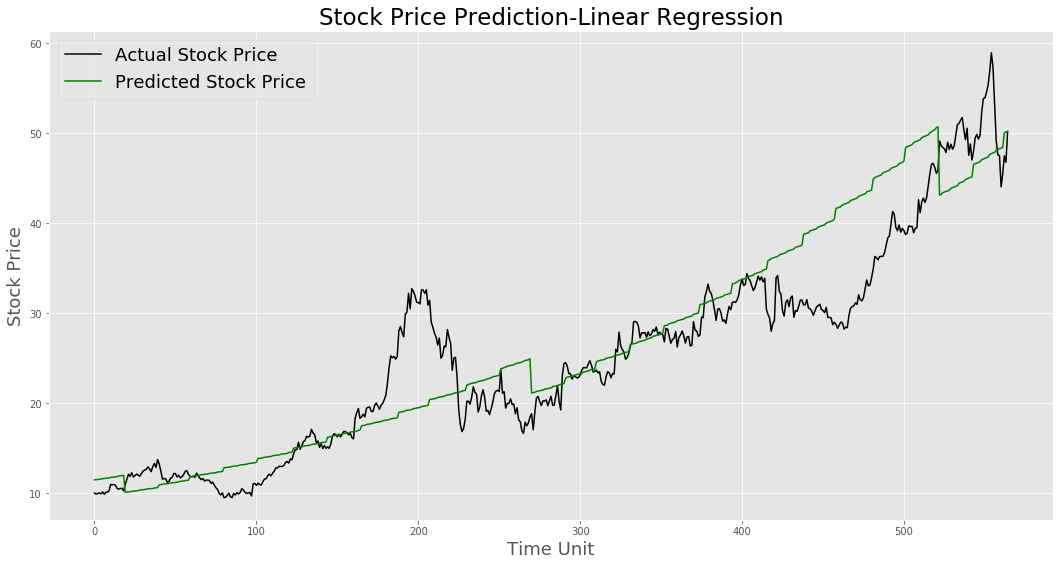

In [64]:
VizPricePredict(lr, 'Linear Regression')

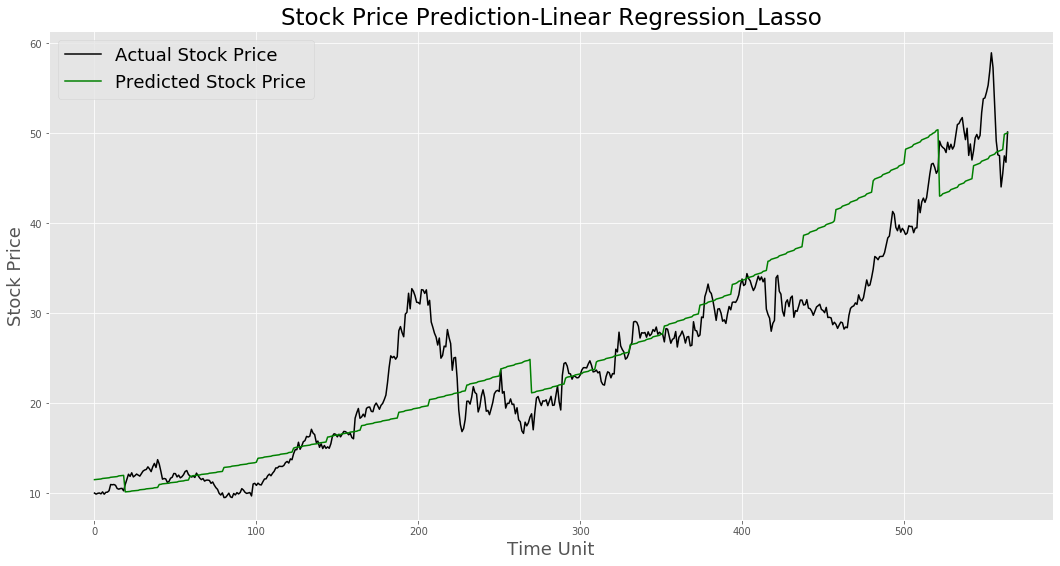

In [65]:
VizPricePredict(lr_lasso, 'Linear Regression_Lasso')

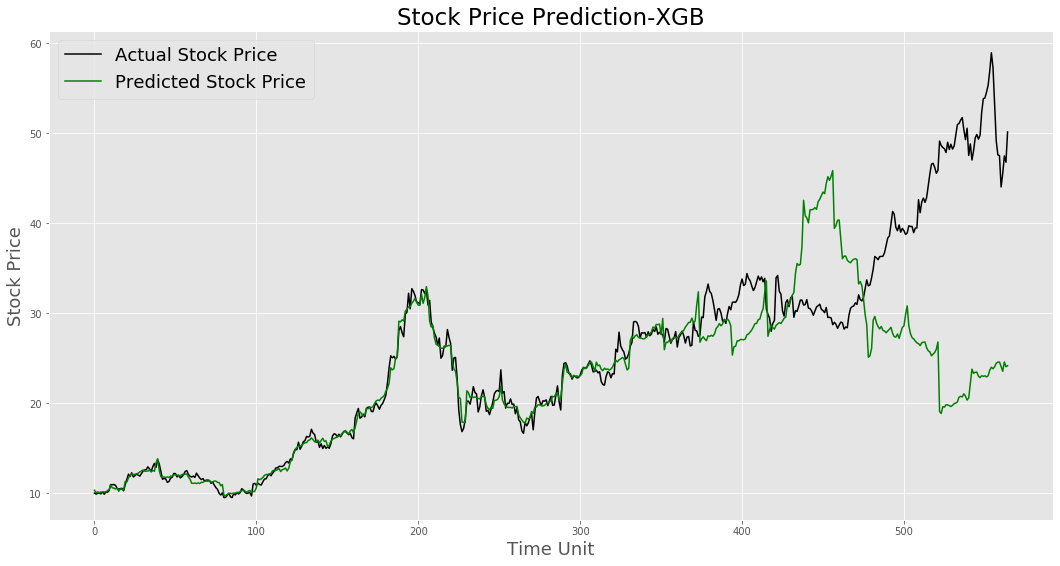

In [66]:
VizPricePredict(XGB_regr, 'XGB')

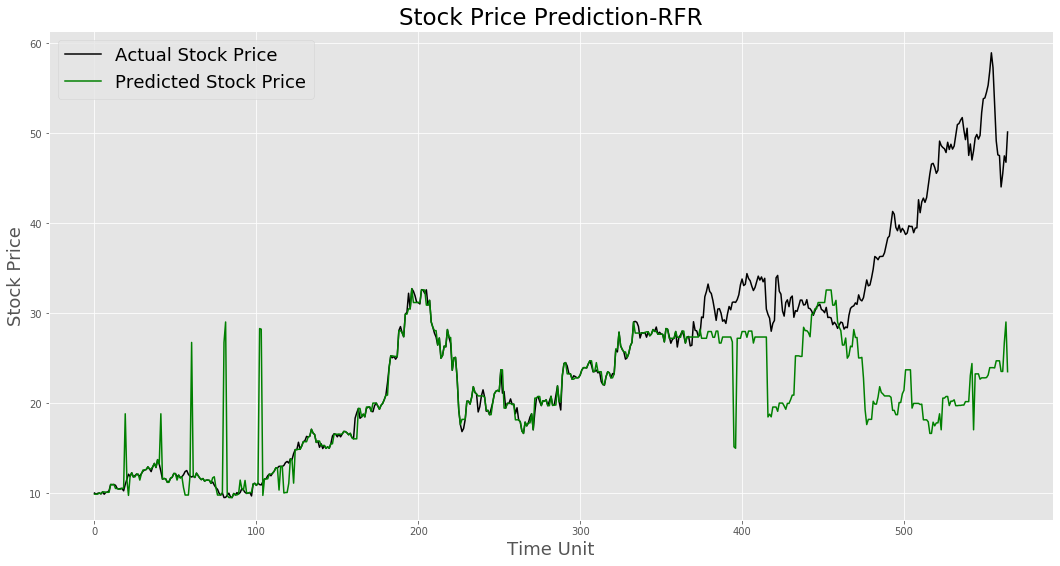

In [67]:
VizPricePredict(forest_reg, 'RFR')

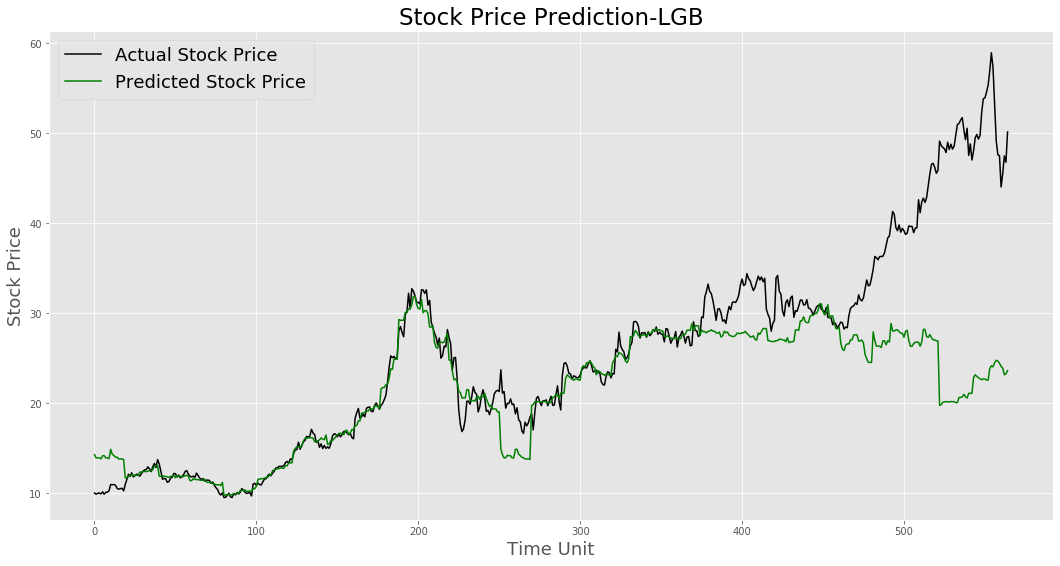

In [68]:
VizPricePredict(lgb, 'LGB')

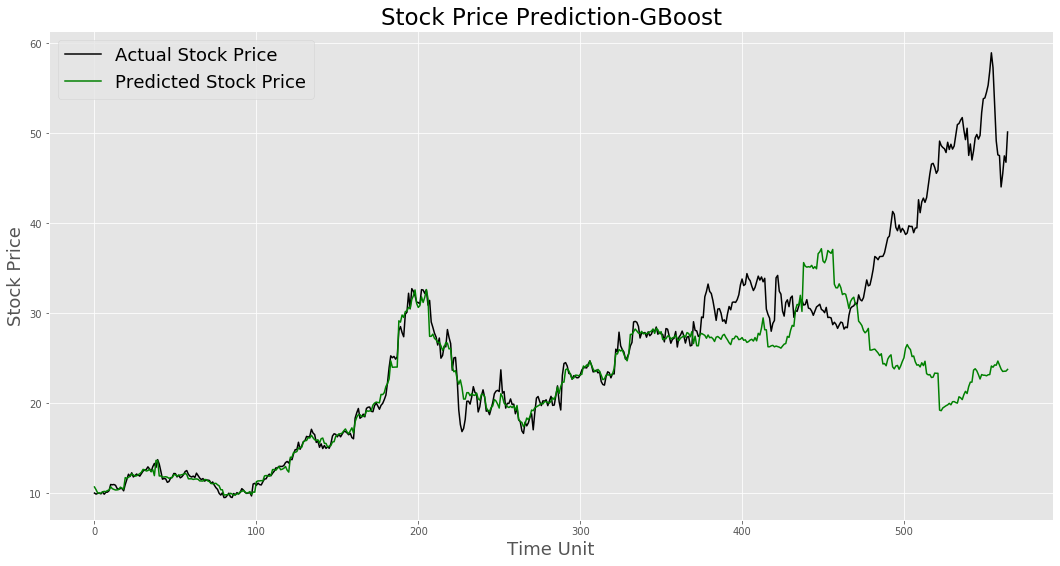

In [69]:
VizPricePredict(model_GBoost, 'GBoost')

In [70]:
#making stock price prediction for the future
import datetime
#a function to get user's input for the date for the stock price prediction
def ObtainDate(text):
    isValid=False
    while not isValid:
        userIn = input(text)
        try: # strptime throws an exception if the input doesn't match the pattern
            d = datetime.datetime.strptime(userIn, "%d/%m/%Y")
            isValid=True
        except:
            print ("Doh, try again!\n")
    return d

a = ObtainDate('Enter the current date (dd/mm/yyyy)(for example: 01/02/2025):')

targetDate = pd.DataFrame({'Year': [a.year], 'Month': [a.month], 'Day': [a.day]})
livePrice = float(input("Enter the current price of the stock: "))

def futurePrice(model, td):
    futurePrice = (np.exp(model.predict(td))-1)*1.05
    return futurePrice

#using the best models to predict

print ('Using model of LR, the future stock price is:', futurePrice(lr, targetDate))
print ('Using model of LR_Lasso, the future stock price is:', futurePrice(lr_lasso, targetDate))
print ('Using model of XBG, the future stock price is:', futurePrice(XGB_regr , targetDate))
print ('Using model of RFR, the future stock price is:', futurePrice(forest_reg , targetDate))
print ('Using model of LGBM, the future stock price is:', futurePrice(lgb, targetDate))
print ('Using model of GB, the future stock price is:', futurePrice(model_GBoost, targetDate))

accurPredict = (1 - (abs(futurePrice(lr, targetDate)-livePrice)/livePrice))*100
print ('The best prediction above is', "%.2f" %accurPredict, '% accurate compared to the current actual price of the stock!')

Enter the current date (dd/mm/yyyy)(for example: 01/02/2025):05/03/2020
Enter the current price of the stock: 48.11
Using model of LR, the future stock price is: [52.7736209]
Using model of LR_Lasso, the future stock price is: [52.5872437]
Using model of XBG, the future stock price is: [25.447052]
Using model of RFR, the future stock price is: [24.675]
Using model of LGBM, the future stock price is: [24.67409805]
Using model of GB, the future stock price is: [24.72682141]
The best prediction above is 90.31 % accurate compared to the current actual price of the stock!


In [71]:
#combine two models with and try to produce better predictive results
def VizPricePredictComb(model1, model2, w1, w2):
    PredictPrice = w1*(np.exp(model1.predict(x))-1)+w2*(np.exp(model2.predict(x))-1)
    
    plt.figure(figsize = (18,9))
    plt.plot(data['Adj Close'], color = 'black', label = 'Actual Stock Price')
    plt.plot(PredictPrice, color = 'green', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction Using Combined Models', fontsize=23)
    plt.xlabel('Time Unit', fontsize=18)
    plt.ylabel('Stock Price', fontsize=18)
    plt.legend(prop={'size': 18})
    plt.show()

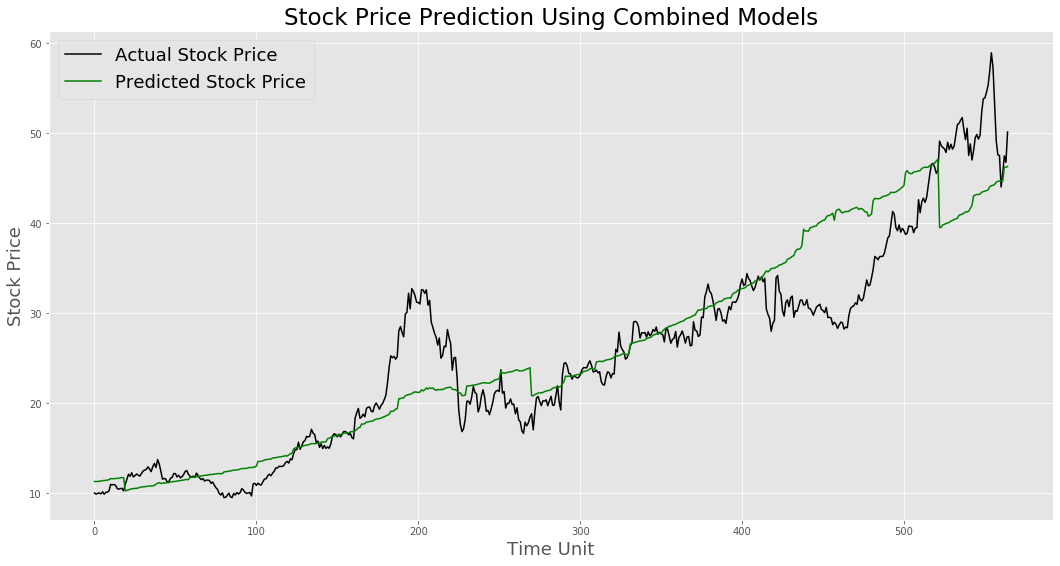

In [72]:
#linear regression+XGB, weights: 0.85, 0.15
VizPricePredictComb(lr, XGB_regr, 0.85, 0.15)

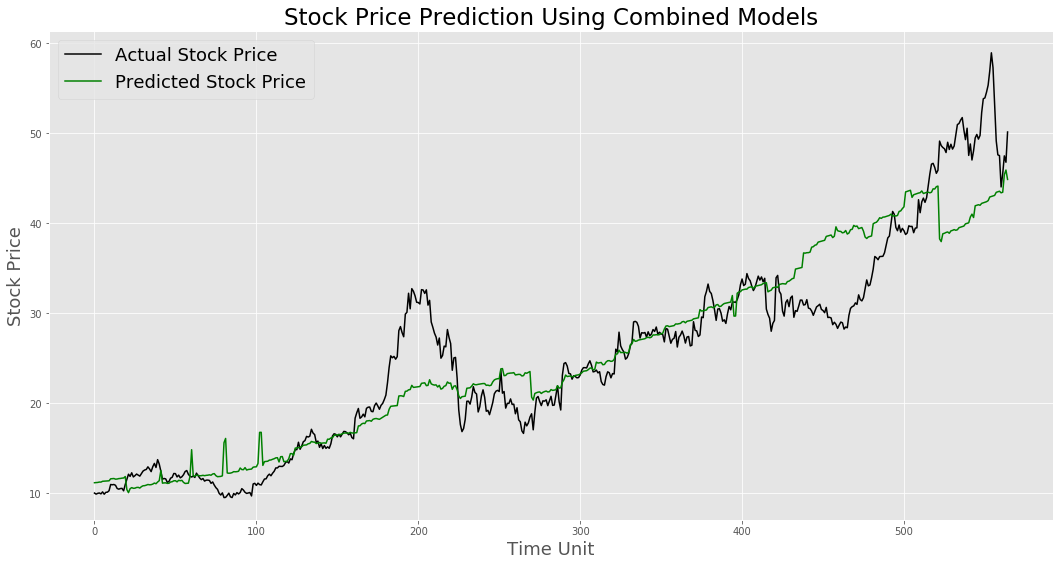

In [73]:
#linear regression+RFR, weights: 0.8, 0.2
VizPricePredictComb(lr, forest_reg, 0.8, 0.2)

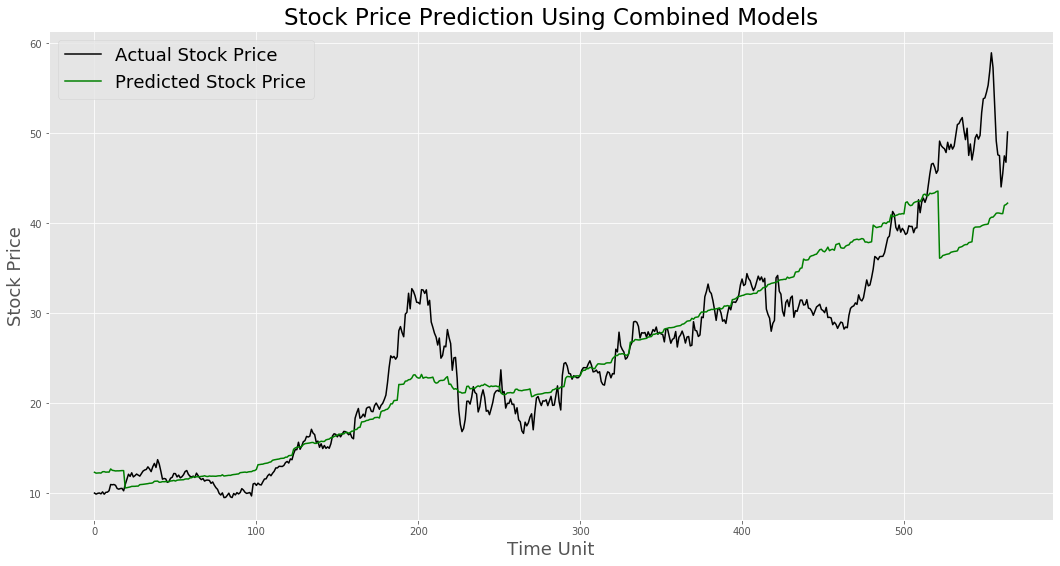

In [74]:
#linear regression+RFR, weights: 0.7, 0.3
VizPricePredictComb(lr, lgb, 0.7, 0.3)

## Since the combination of the models of linear regression and XGB does a great job in predicting the price of the stock, with the weights, it will be used to predict the future return of the stock if invested today.

In [77]:
#future returns on investment in the chosen stock from today's purchase
FutTarDate = ObtainDate('Enter the target sold date for the stock (dd/mm/yyyy)(for example: 01/02/2025):')

targetDate = pd.DataFrame({'Year': [FutTarDate.year], 'Month': [FutTarDate.month], 'Day': [FutTarDate.day]})

def whole_data_training_comb(model1, model2, w1, w2):
        model1.fit(x,y)
        model2.fit(x,y)
        PredictPrice = w1*(np.exp(model1.predict(targetDate))-1)+w2*(np.exp(model2.predict(targetDate))-1)
        return PredictPrice
    
PredictPrice = whole_data_training_comb(lr, XGB_regr, 0.85, 0.15)

returns = ((PredictPrice - livePrice)/livePrice)*100

print('The future price on the target date will be prediected as: ', PredictPrice  )
print ('If invested today, the future returns on the chosen stock till the target date is: ', "%.2f" %returns, '%!')

Enter the target sold date for the stock (dd/mm/yyyy)(for example: 01/02/2025):05/03/2021
[00:00:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The future price on the target date will be prediected as:  [84.14535809]
If invested today, the future returns on the chosen stock till the target date is:  74.90 %!
